In [1]:
%run ../methodes/neural_network_definition.ipynb import Neural_Network_
import pandas as pd

# On récupère le dataframe d'entraînement stocké en mémoire
%store -r df_train

In [2]:
# La constante multiplicateur (alpha) du terme de régularisation doit être > 0
alphas = np.linspace(0, 4, 10)

In [3]:
# Initialisation des meilleurs paramètres
err_min = 100
neural_network_best_alpha = -2

In [4]:
# Initialisation des tableaux pour l'analyse des données
df_alpha_train = pd.Series(0, index=alphas)
df_alpha_test = pd.Series(0, index=alphas)

In [5]:
%%capture --no-display
%run utils.ipynb import K_Fold

for alpha in alphas:
    
    # Validation croisée avec K_Fold
    err_train, err_test = K_Fold(10, df_train, Neural_Network_(alpha))

    # Calcul de l'erreur totale
    err = (err_train + err_test) / 2 

    # On garde les données en mémoire
    df_alpha_train[alpha] = err_train
    df_alpha_test[alpha] = err_test
                
    # On met à jour les meilleurs paramètres
    if err < err_min:
        err_min = err
        neural_network_best_alpha = alpha

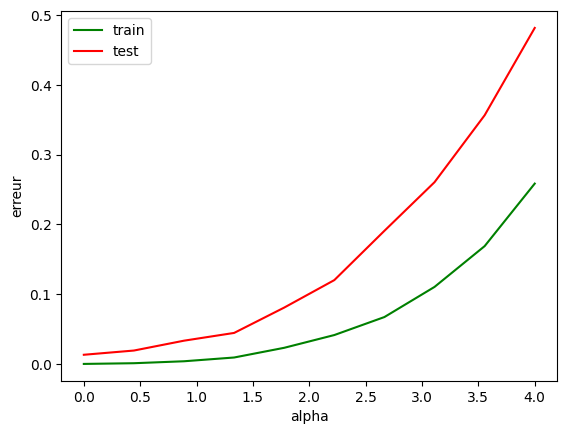

In [6]:
# Représentation graphique

# Evolution de l'erreur moyenne en fonction de alpha
plot_df(df_alpha_train, df_alpha_test, 'alpha', 'index', False)

In [7]:
# Affichage des meilleurs hyperparamètres trouvés
print('err_min : ', err_min, ' | alpha : ', neural_network_best_alpha)

err_min :  0.006565656565656566  | alpha :  0.0


In [8]:
# On stocke les meilleurs hyperparamètres trouvés
%store neural_network_best_alpha

Stored 'neural_network_best_alpha' (float64)
